# ***1, Khai báo các thư viện cần sử dụng ***


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# **2. Kết nối với Google Drive để đọc và lưu dữ liệu**


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/PTDLL/animal_dataset_intermediate/train"
valid_image_files_path = "/content/drive/MyDrive/PTDLL/animal_dataset_intermediate/validation"

**4. Gán nhãn dữ liệu**

# **4. Gán nhãn dữ liệu**

In [ ]:
label=['Voi','Buom','Bo','Cuu','Soc']

# **5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

# **6. Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(224, 224),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,                                         
    target_size=(224, 224),           
    class_mode='categorical')  

Found 8222 images belonging to 5 classes.
Found 1808 images belonging to 5 classes.


# **7. Xây dựng mô hình**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  


 
  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(5, activation=tf.nn.softmax)) # 4 đầu ra 

In [ ]:
#from tensorflow.keras.optimizers import Adam
#model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# **8. Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

**9. Huấn luyện mô hình //model.fit_gener5 Epoch => 13phut** //25 //50 = >> 58 phut

In [ ]:
EPOCHS=25
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=4)

Epoch 1/25
4/4 [==============================] - 68s 16s/step - loss: 5.9127 - acc: 0.2109 - val_loss: 2.4818 - val_acc: 0.1328
Epoch 2/25
4/4 [==============================] - 58s 17s/step - loss: 1.7812 - acc: 0.2188 - val_loss: 1.6113 - val_acc: 0.1484
Epoch 3/25
4/4 [==============================] - 57s 17s/step - loss: 1.5883 - acc: 0.1797 - val_loss: 1.5847 - val_acc: 0.1953
Epoch 4/25
4/4 [==============================] - 52s 15s/step - loss: 1.5267 - acc: 0.2812 - val_loss: 1.6459 - val_acc: 0.1172
Epoch 5/25
4/4 [==============================] - 49s 14s/step - loss: 1.4789 - acc: 0.2969 - val_loss: 1.5548 - val_acc: 0.2031
Epoch 6/25
4/4 [==============================] - 50s 14s/step - loss: 1.4486 - acc: 0.3281 - val_loss: 1.5333 - val_acc: 0.3203
Epoch 7/25
4/4 [==============================] - 47s 14s/step - loss: 1.5301 - acc: 0.3594 - val_loss: 1.5434 - val_acc: 0.3203
Epoch 8/25
4/4 [==============================] - 42s 12s/step - loss: 1.5910 - acc: 0.2500 - val

# **10. Sử dụng mô hình**


Saving e13cb60a2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg to e13cb60a2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg
[[0. 0. 0. 1. 0.]]
Giá trị dự đoán:  Cuu


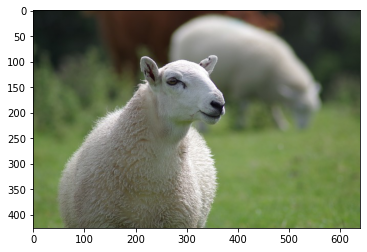

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])